In [62]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Load data

In [63]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [64]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [65]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [66]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Analyzing

### Info, describe

In [67]:
train.info()
print('-----------------------------------------')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [68]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


### Null values

<AxesSubplot:>

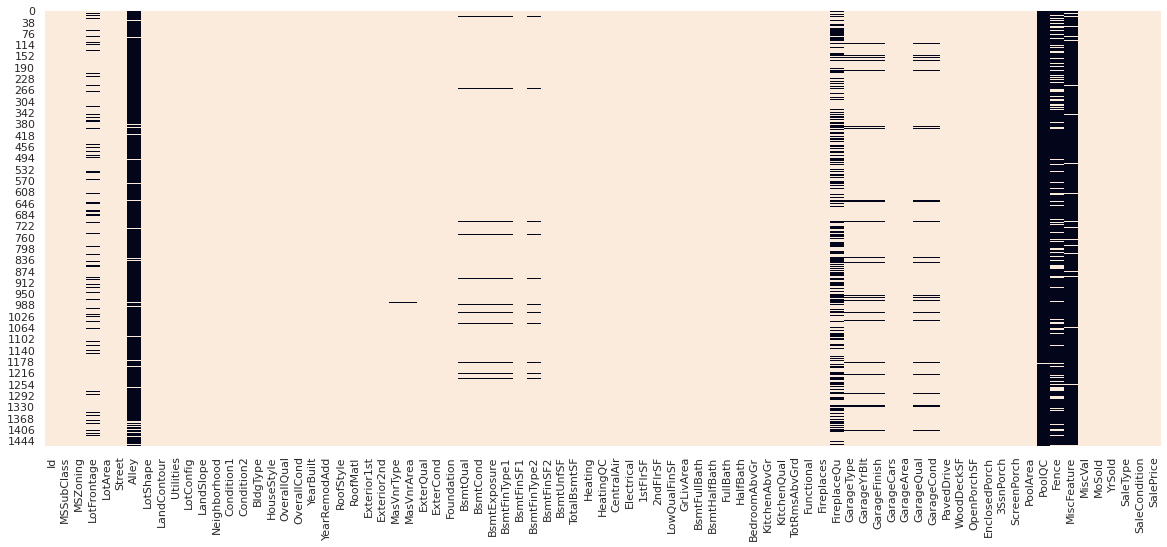

In [69]:
plt.subplots(figsize=(20,8))
sns.heatmap(train.isnull(), cmap='rocket_r', cbar=False)

<AxesSubplot:>

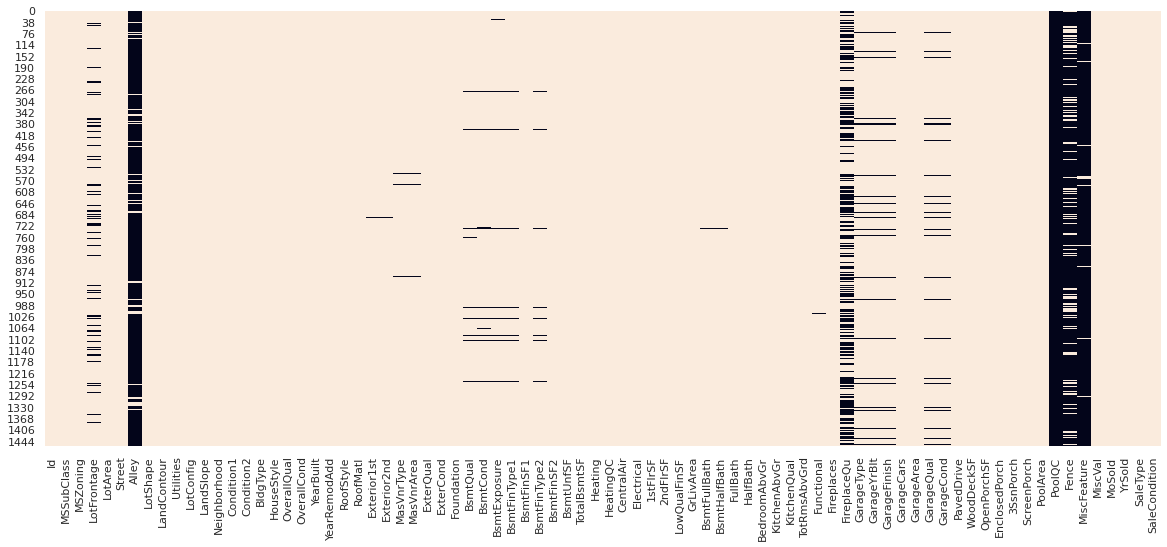

In [70]:
plt.subplots(figsize=(20,8))
sns.heatmap(test.isnull(), cmap='rocket_r', cbar=False)

### Numerical values

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>],
       [<AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>],
       [<AxesSubplot:title={'center':'Ful

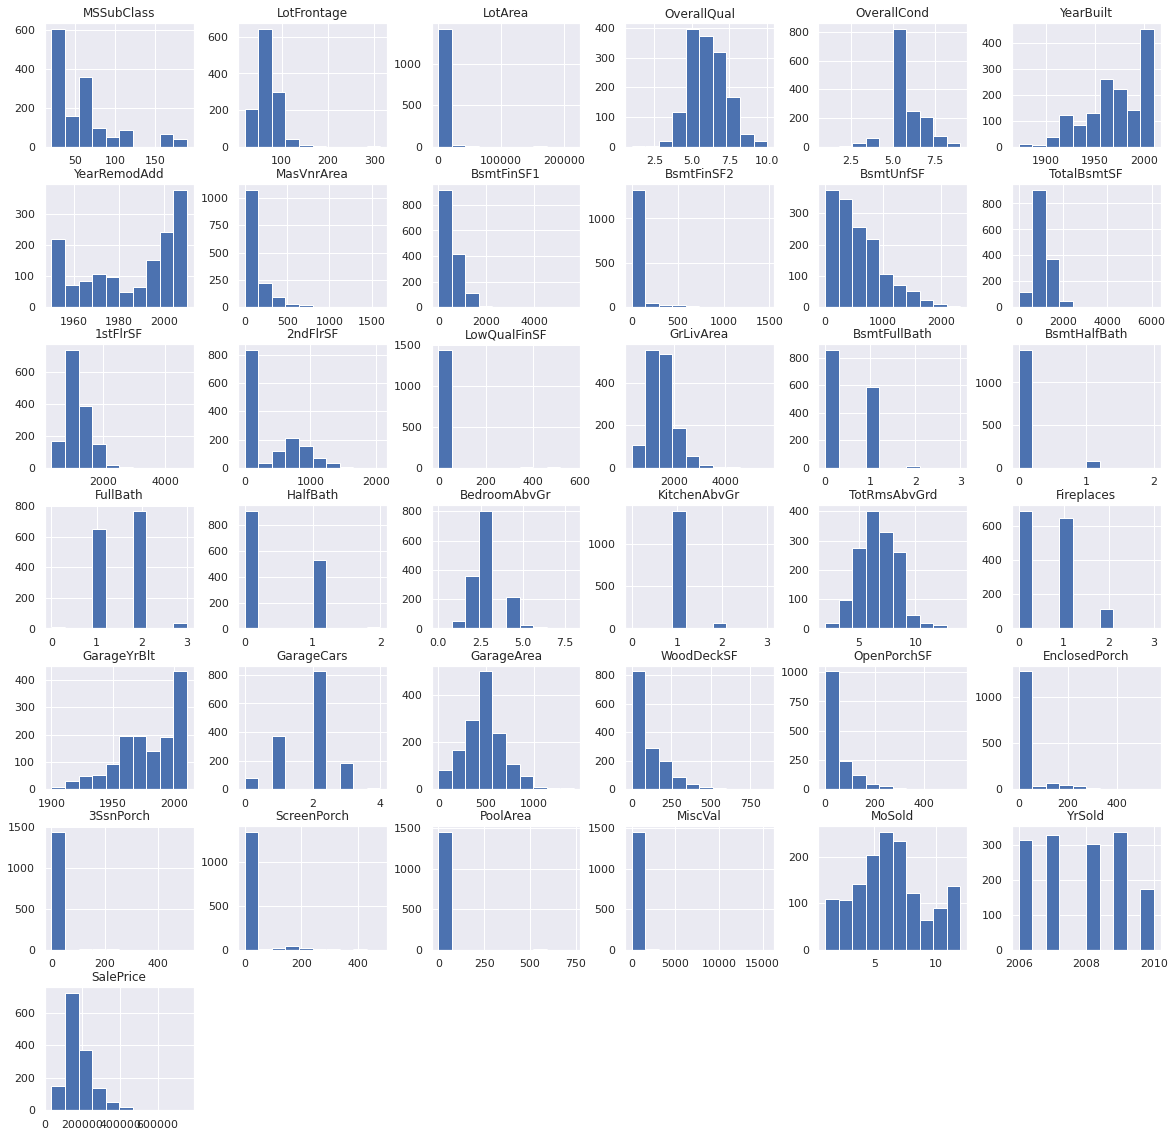

In [71]:
train.drop(["Id"], axis=1).hist(figsize=(20,20))

<AxesSubplot:>

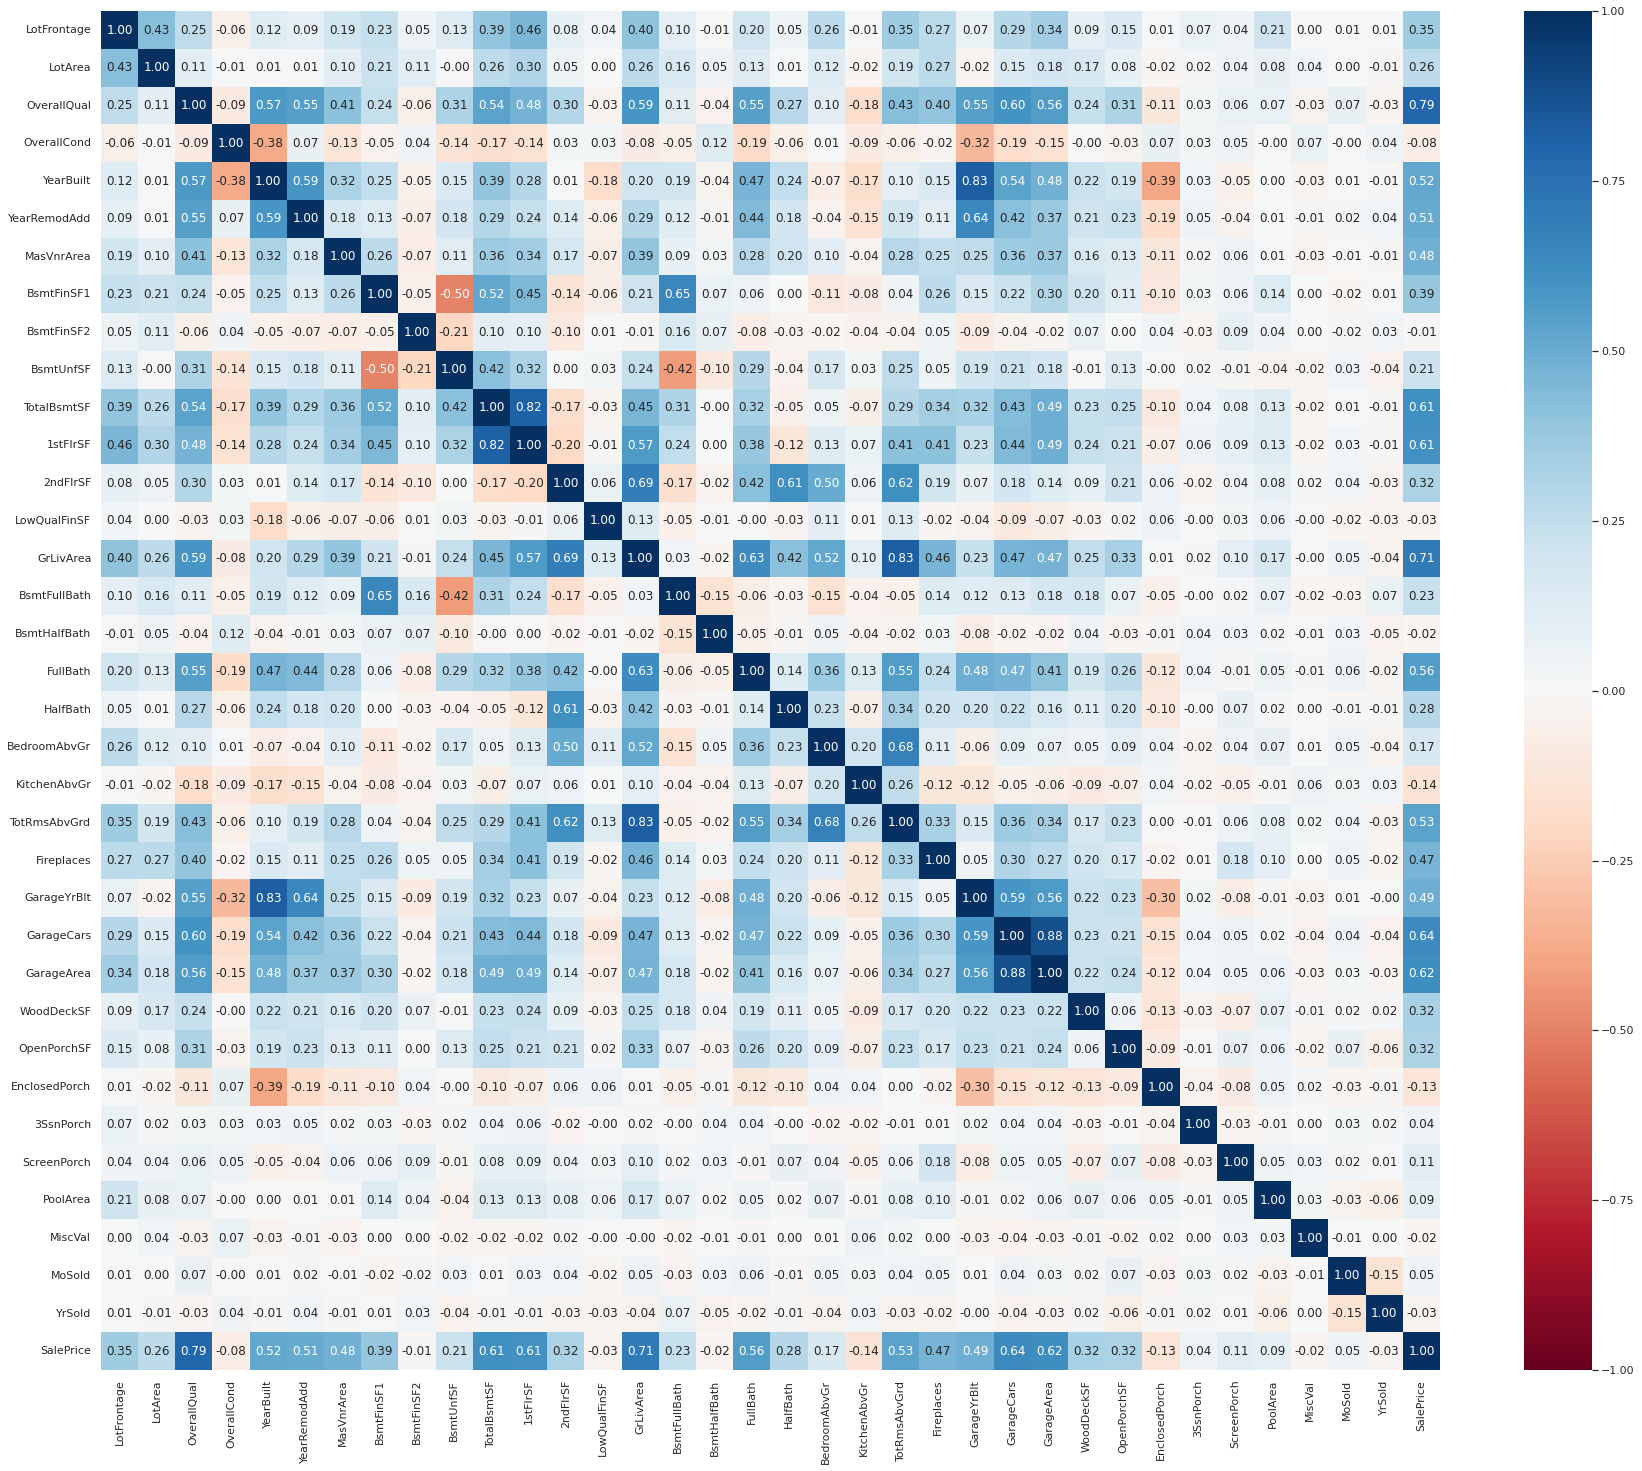

In [72]:
plt.subplots(figsize=(30,25))
sns.heatmap(train.drop(['Id', 'MSSubClass'], axis=1).corr(),
            cmap='RdBu', annot=True, fmt='.2f', cbar=True, vmin=-1, vmax=1)

### Categorical values

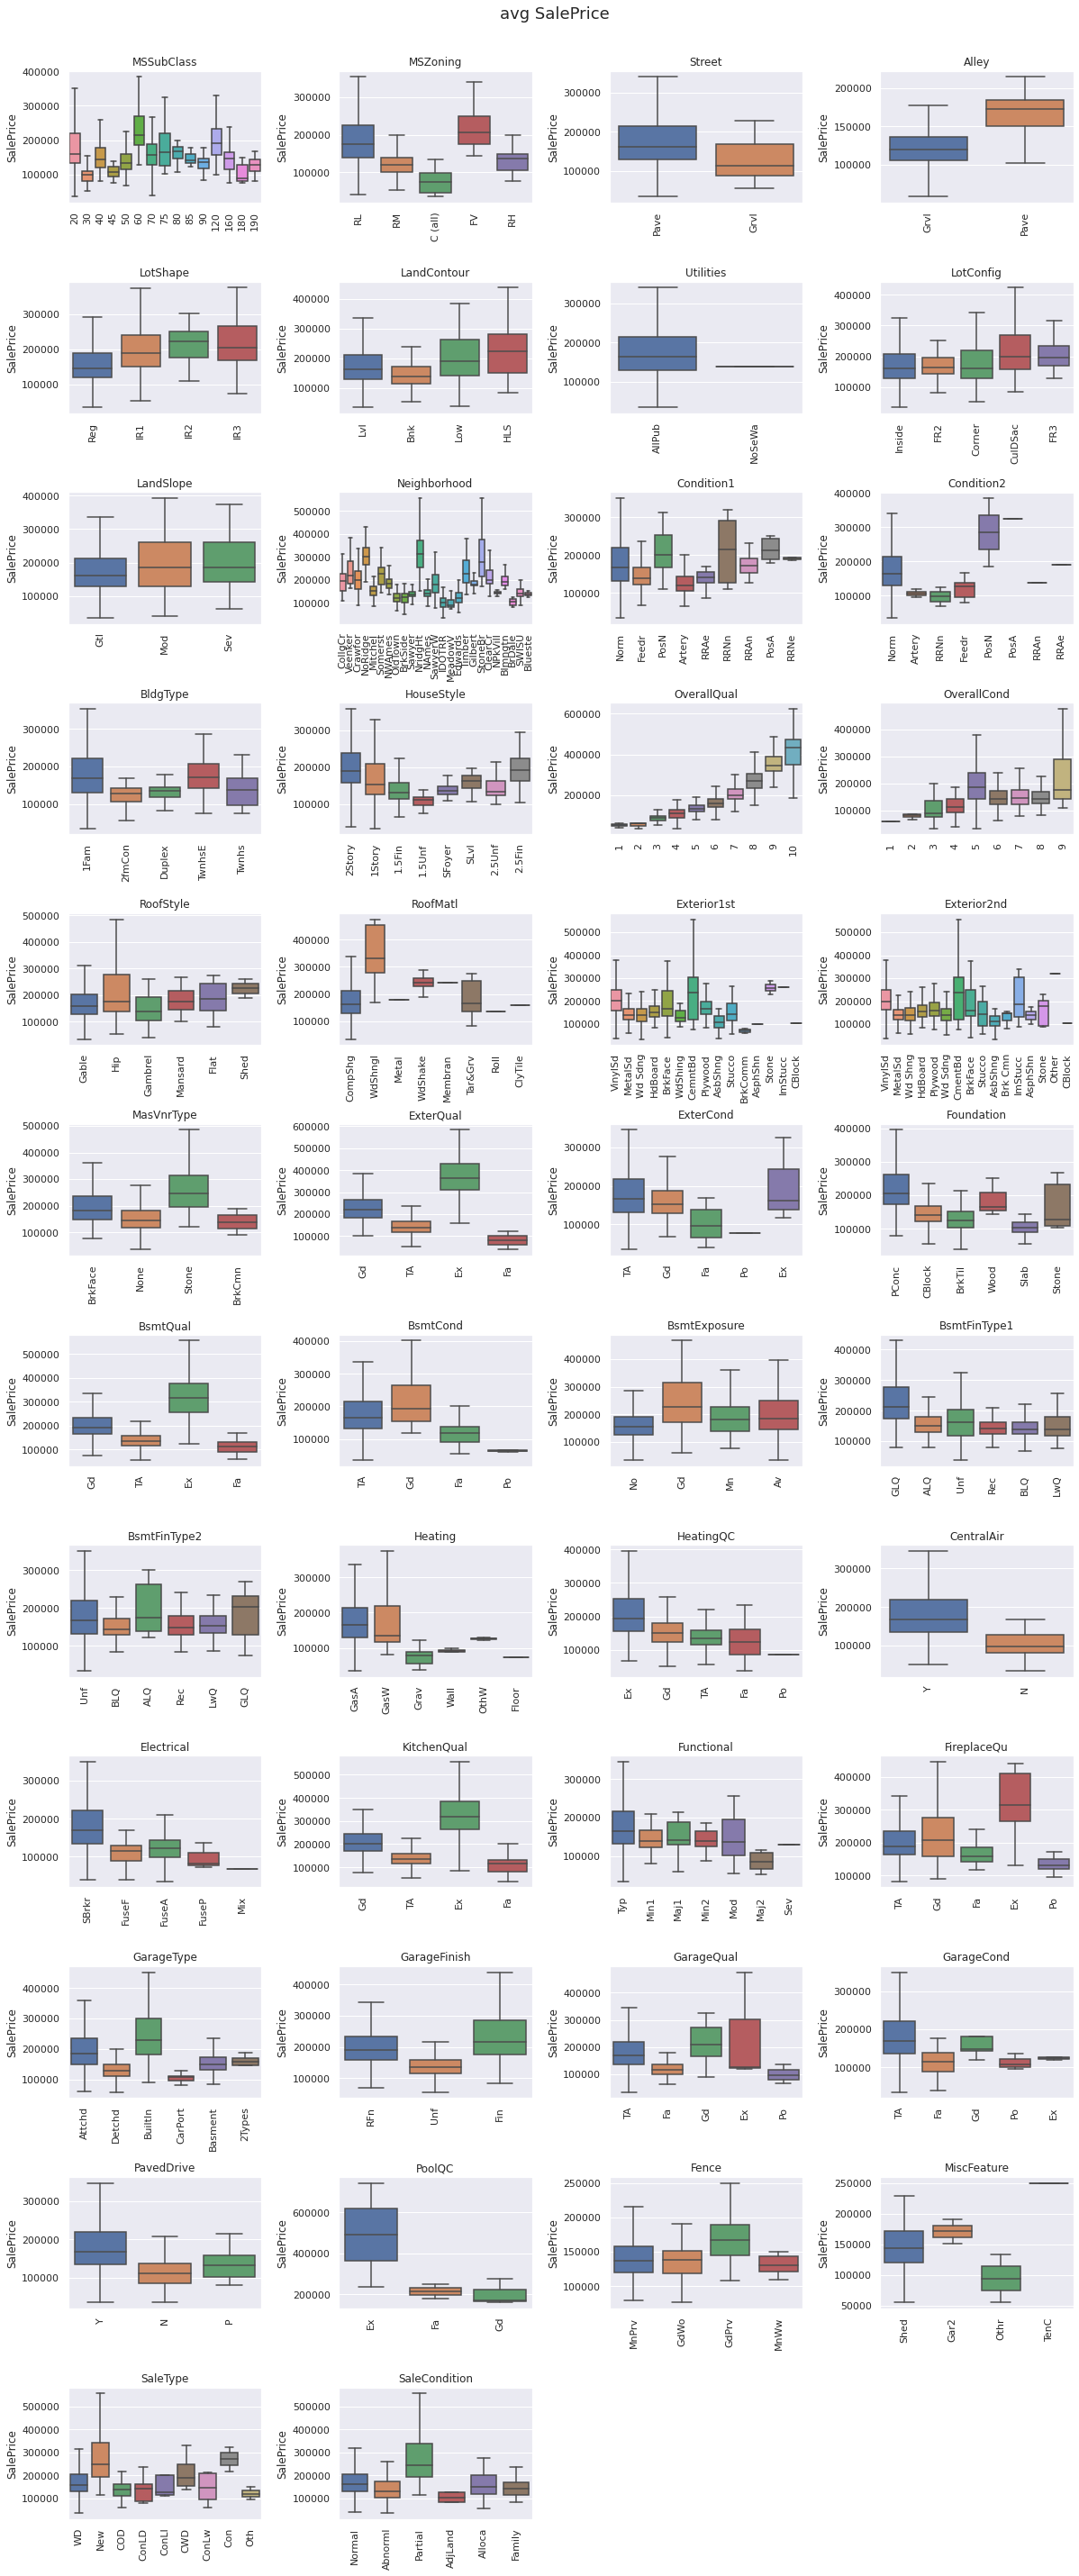

In [73]:
cats = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',\
        'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',\
        'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',\
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',\
        'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',\
        'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

plt.figure(figsize=(20,50))
plt.subplots_adjust(hspace=0.6, wspace=0.4)
plt.suptitle("avg SalePrice", fontsize=18, y=0.9)

ncols = 4
nrows = len(cats) // ncols + (len(cats) % ncols > 0)

for n, cat in enumerate(cats):
    ax = plt.subplot(nrows, ncols, n + 1)
    # train.groupby(cat)['SalePrice'].mean().plot(ax=ax, kind='bar') # mean only
    sns.boxplot(x=cat, y='SalePrice', data=train, showfliers=False, ax=ax) # boxplot
    ax.set_title(cat)
    ax.set_xlabel("")
    plt.xticks(rotation=90)

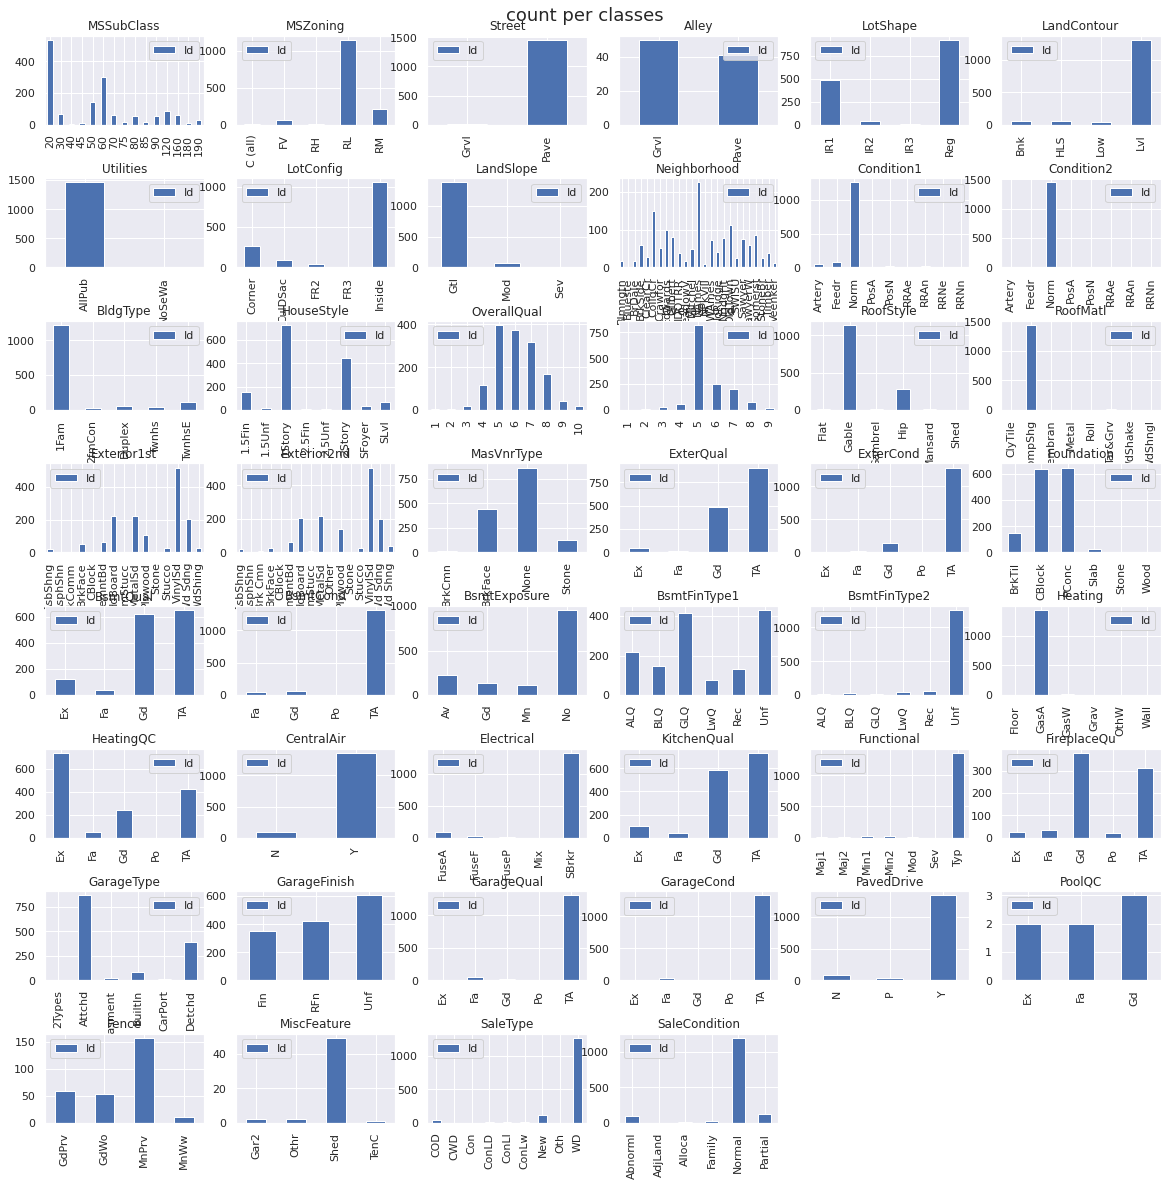

In [74]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.6, wspace=0.2)
plt.suptitle("count per classes", fontsize=18, y=0.9)

ncols = 6
nrows = len(cats) // ncols + (len(cats) % ncols > 0)

for n, cat in enumerate(cats):
    ax = plt.subplot(nrows, ncols, n + 1)
    train[['Id', cat]].groupby(cat).count().plot(ax=ax, kind='bar')
    ax.set_title(cat)
    ax.set_xlabel("")
    plt.xticks(rotation=90)

# Feature engineering

##### LotFrontage and LotArea

In [75]:
df_tmp = train[['SalePrice', 'LotFrontage', 'LotArea']].copy()
mean_ratio = df_tmp['LotArea'].mean(skipna=True)/df_tmp['LotFrontage'].mean(skipna=True)
df_tmp.loc[df_tmp['LotFrontage'].isna() & ~df_tmp['LotArea'].isna(), 'LotFrontage'] = df_tmp['LotArea'] / mean_ratio
df_tmp['new_feature'] = df_tmp['LotFrontage'] * 0.5 + df_tmp['LotArea']
df_tmp.corr()['SalePrice']

SalePrice      1.000000
LotFrontage    0.210547
LotArea        0.263843
new_feature    0.263870
Name: SalePrice, dtype: float64

##### YearBuilt and YearRemodAdd

In [76]:
df_tmp = train[['SalePrice', 'YearBuilt', 'YearRemodAdd']].copy()
df_tmp['new_feature'] = (df_tmp['YearBuilt'] + df_tmp['YearRemodAdd']) / 2
df_tmp.corr()['SalePrice']

SalePrice       1.000000
YearBuilt       0.522897
YearRemodAdd    0.507101
new_feature     0.576144
Name: SalePrice, dtype: float64

New feature based on YearBuilt and YearRemodAdd has better correlation

##### Basement

In [77]:
dict_qual = {'Ex': 5,
             'Gd': 4,
             'TA': 3,
             'Fa': 2,
             'Po': 1,
             'NA': 0,
             np.nan: 0}
dict_expo = {'Gd': 4,
             'Av': 3,
             'Mn': 2,
             'No': 1,
             'NA': 0,
             np.nan: 0}
dict_fin = {'GLQ': 6,
            'ALQ': 5,
            'BLQ': 4,
            'Rec': 3,
            'LwQ': 2,
            'Unf': 1,
            'NA': 0,
            np.nan: 0}

df_tmp = train[['SalePrice', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',\
                'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']].copy()

def cat_to_num(cols, map_dict):
    for col in cols:
        df_tmp[col] = df_tmp[col].map(map_dict)
        df_tmp[col] = df_tmp[col] / len(map_dict)

cat_to_num(['BsmtQual', 'BsmtCond'], dict_qual)
cat_to_num(['BsmtExposure'], dict_expo)
cat_to_num(['BsmtFinType1', 'BsmtFinType2'], dict_fin)

df_tmp.fillna(0, inplace=True)

df_tmp['new_feature_1'] = df_tmp['BsmtQual'] + df_tmp['BsmtCond'] * df_tmp['BsmtExposure']
df_tmp['new_feature_2'] = df_tmp['BsmtFinType1'] * df_tmp['BsmtFinSF1'] + df_tmp['BsmtFinType2'] * df_tmp['BsmtFinSF2'] + df_tmp['TotalBsmtSF']
df_tmp['new_feature_3'] = df_tmp['new_feature_1'] * df_tmp['new_feature_2']

df_tmp.corr()['SalePrice']

SalePrice        1.000000
BsmtQual         0.585207
BsmtCond         0.212607
BsmtExposure     0.374696
BsmtFinType1     0.304908
BsmtFinSF1       0.386420
BsmtFinType2    -0.005323
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
new_feature_1    0.597175
new_feature_2    0.615821
new_feature_3    0.680142
Name: SalePrice, dtype: float64

Create 1 feature (new_feature_3) depending on other basement features

##### GrLivArea

In [78]:
df_tmp = train[['SalePrice', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea']].copy()
df_tmp['new_feature_1'] = df_tmp['GrLivArea'] * np.where(df_tmp['2ndFlrSF'] > 0, 0.8, 1)
df_tmp['new_feature_2'] = df_tmp['1stFlrSF'] + 0.7 * df_tmp['2ndFlrSF']

df_tmp.corr()['SalePrice']

SalePrice        1.000000
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
new_feature_1    0.761589
new_feature_2    0.751469
Name: SalePrice, dtype: float64

Create 1 feature (new_feature_1) depending on GrLivArea and 2ndFlrSF

##### Baths

In [79]:
df_tmp = train[['SalePrice', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']].copy()
df_tmp['new_feature_1'] = df_tmp['FullBath'] + df_tmp['HalfBath']/2
df_tmp['new_feature_2'] = 0.5 * (df_tmp['BsmtFullBath'] + df_tmp['BsmtHalfBath'] / 2) \
+ df_tmp['FullBath'] + df_tmp['HalfBath'] / 2

df_tmp.corr()['SalePrice']

SalePrice        1.000000
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
new_feature_1    0.597966
new_feature_2    0.657402
Name: SalePrice, dtype: float64

Create 1 feature (new_feature_2) depending other bath columns

##### Garage

In [80]:
dict_garage = {'Fin': 3,
               'RFn': 2,
               'Unf': 1,
               'NA': 0,
               np.nan: 0}
        

df_tmp = train[['SalePrice', 'GarageType', 'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond']].copy()
df_tmp.fillna(0, inplace=True)
cat_to_num(['GarageFinish'], dict_garage)
cat_to_num(['GarageQual', 'GarageCond'], dict_qual)

df_group = train.groupby('GarageType')['SalePrice'].mean()
df_tmp['GarageType'] = df_tmp['GarageType'].map(lambda x: df_group[x])

df_tmp['new_feature'] = df_tmp['GarageType'] * df_tmp['GarageFinish'] * df_tmp['GarageArea']

df_tmp.corr()['SalePrice']

SalePrice       1.000000
GarageType      0.480628
GarageFinish    0.513105
GarageArea      0.623431
GarageQual      0.156693
GarageCond      0.125013
new_feature     0.725109
Name: SalePrice, dtype: float64

Create 1 feature (new_feature) for Garage

##### Porch

In [81]:
df_tmp = train[['SalePrice', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']].copy()
df_tmp.fillna(0, inplace=True)
df_tmp['new_feature'] = df_tmp['OpenPorchSF'] + df_tmp['WoodDeckSF']
df_tmp.corr()['SalePrice']

SalePrice        1.000000
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
new_feature      0.424258
Name: SalePrice, dtype: float64

Create 1 feature (new_feature) for WoodDeck and Porch

##### MoSold, YrSold

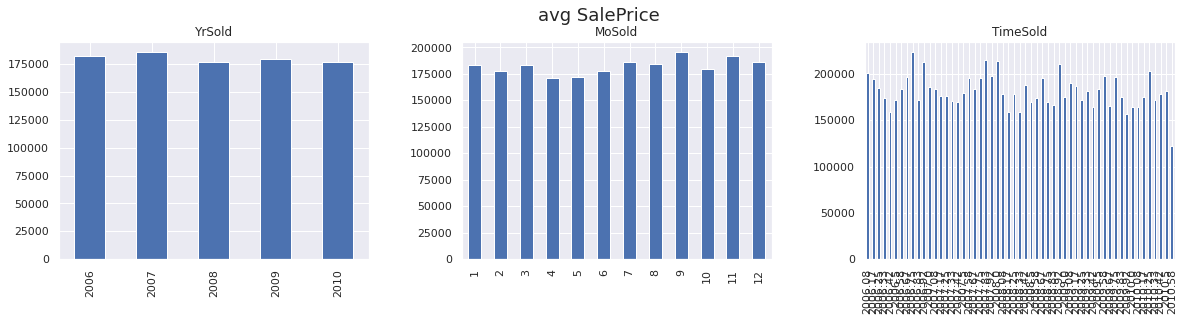

In [82]:
df_tmp = train[['SalePrice', 'MoSold', 'YrSold']].copy()
df_tmp['TimeSold'] = np.round(df_tmp['YrSold'] + df_tmp['MoSold'] / 12, 2)

plt.figure(figsize=(20,4))
plt.subplots_adjust(wspace=0.3)
plt.suptitle("avg SalePrice", fontsize=18, y=1)

for n, cat in enumerate(['YrSold', 'MoSold', 'TimeSold']):
    ax = plt.subplot(1, 3, n + 1)
    df_tmp.groupby(cat)['SalePrice'].mean().plot(ax=ax, kind='bar')
    ax.set_title(cat)
    ax.set_xlabel("")
    plt.xticks(rotation=90)

Time sold is not related to SalePrice

# Prepare data for ML

In [83]:
X_train = train.drop("SalePrice", axis=1)
X_test = test.copy()
y_train = train["SalePrice"]

for df in [X_train, X_test]:
    
    #------------------------------------------------------------------------------------------------------------------
    # REPLACE NULLS
    
    # Replace nulls LotFrontage depending on LotArea
    mean_ratio = train['LotArea'].mean(skipna=True)/train['LotFrontage'].mean(skipna=True)
    df.loc[df['LotFrontage'].isna() & ~df['LotArea'].isna(), 'LotFrontage'] = df['LotArea'] / mean_ratio
    
    # Replace by mode (mainly categorical values)
    cols_mode = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', \
                 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', \
                 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', \
                 'ExterCond', 'Foundation', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'TotRmsAbvGrd', \
                 'Functional', 'SaleType', 'SaleCondition']
    for col in cols_mode:
        df[col].fillna(train[col].dropna().mode()[0], inplace=True)
    
    # Replace by mean (mainly numerical values)
    cols_mean = ['LotFrontage', 'LotArea', 'MasVnrArea', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea']
    for col in cols_mean:
        df[col].fillna(train[col].dropna().mean(), inplace=True)
    
    # Replace by 0 (NA means 0)
    cols_zero = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', \
                 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', \
                 'FireplaceQu', 'GarageFinish', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', \
                 'PoolArea', 'Fence', 'MiscVal']
    for col in cols_zero:
        df[col].fillna(0, inplace=True)
    
    #------------------------------------------------------------------------------------------------------------------
    # FEATURE ENGINEERING
    
    # ----- Replace categories with avg SalePrice per class
    cols_avg = ['MSSubClass', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', \
                'RoofStyle', 'MasVnrType', 'Foundation', 'GarageType', 'SaleType', 'SaleCondition']
    for col in cols_avg:
        # Replace categories with avg SalePrice per class
        train_classes = train[col].dropna().unique()
        for i_class in df[col].dropna().unique():
            if i_class in train_classes: # check if all classes in test set are in train
                df.loc[df[col] == i_class, col] = train[train[col] == i_class]['SalePrice'].mean()
            else: # classes not existing in test set replace by mean
                df[col].replace(i_class, X_train[col].mean(), inplace=True)
        # Count mean for nan values (for categories where NA means no feature like no garage)
        if df[col].isna().any():
            df.loc[df[col].isna(), col] = train[train[col].isna()]['SalePrice'].mean()
        df[col] = df[col].astype('float64')
    
    # ----- Replace categorical values by integers
    df['Street'].replace({'Grvl': 0, 'Pave': 1}, inplace=True)
    df['Alley'].replace({'Grvl': 1, 'Pave': 2}, inplace=True)
    df['LotShape'].replace(['IR1', 'IR2', 'IR3'], 0, inplace=True)
    df['LotShape'].replace('Reg', 1, inplace=True)
    df['LandSlope'].replace({'Gtl': 0, 'Mod': 1, 'Sev': 2}, inplace=True)
    df['ExterQual'].replace({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}, inplace=True)
    df['ExterCond'].replace({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}, inplace=True)
    df['HeatingQC'].replace({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}, inplace=True)
    df['CentralAir'].replace({'Y': 1, 'N': 0}, inplace=True)
    df['Electrical'].replace('SBrkr', 1, inplace=True)
    df['Electrical'].replace(['FuseA', 'FuseF', 'FuseP', 'Mix'], 0, inplace=True)
    df['KitchenQual'].replace({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}, inplace=True)
    df['Functional'].replace(['Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'], 0, inplace=True)
    df['Functional'].replace('Typ', 1, inplace=True)
    df['FireplaceQu'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}, inplace=True)
    df['GarageFinish'].replace({'Fin': 3, 'RFn': 2, 'Unf': 1}, inplace=True)
    df['PavedDrive'].replace({'Y': 3, 'P': 2, 'N': 1}, inplace=True)
    df['Fence'].replace({'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1}, inplace=True)
    
    # ----- Other replacements
    # Replace LotFrontage, LotArea by 1 feature
    df['Lot'] = df['LotArea'] + 0.5 * df['LotFrontage']
    
    # Replace Condition1 and Condition2 as sum based on avg SalePrice per class
    df_tmp = pd.concat([train[['SalePrice', 'Condition1']], \
                        train[['SalePrice', 'Condition2']].rename(columns={'Condition2': 'Condition1'})])
    df_tmp = df_tmp.groupby('Condition1').mean()
    for col in ['Condition1', 'Condition2']:
        for i_class in df[col].unique():
            df.loc[df[col] == i_class, col] = df_tmp.loc[i_class][0]
        df[col] = df[col].astype('float64')
    df['Condition'] = df['Condition1'] + df['Condition2']
    
    # Replace YearBuilt and YearRemodAdd by mean of 2 cols
    df['YearBuiltRemod'] = np.mean([df['YearBuilt'], df['YearRemodAdd']])
    
    # Replace Exterior1st and Exterior2nd as sum based on avg SalePrice per class (same way as Condition)
    df_tmp = pd.concat([train[['SalePrice', 'Exterior1st']], \
                        train[['SalePrice', 'Exterior2nd']].rename(columns={'Exterior2nd': 'Exterior1st'})])
    df_tmp = df_tmp.groupby('Exterior1st').mean()
    for col in ['Exterior1st', 'Exterior2nd']:
        for i_class in df[col].unique():
            df.loc[df[col] == i_class, col] = df_tmp.loc[i_class][0]
        df[col] = df[col].astype('float64')
    df['Exterior'] = df['Exterior1st'] + df['Exterior2nd']
    
    # Replace all Bsmt features by 1 feature
    df['BsmtQual'].replace({'Ex': 1, 'Gd': 0.8, 'TA': 0.6, 'Fa': 0.4, 'Po': 0.2}, inplace=True)
    df['BsmtCond'].replace({'Ex': 1, 'Gd': 0.8, 'TA': 0.6, 'Fa': 0.4, 'Po': 0.2}, inplace=True)
    df['BsmtExposure'].replace({'Gd': 1, 'Av': 0.75, 'Mn': 0.5, 'No': 0.25}, inplace=True)
    df['BsmtFinType1'].replace({'GLQ': 1, 'ALQ': 5/6, 'BLQ': 4/6, 'Rec': 3/6, 'LwQ': 2/6, 'Unf': 1/6,}, inplace=True)
    df['BsmtFinType2'].replace({'GLQ': 1, 'ALQ': 5/6, 'BLQ': 4/6, 'Rec': 3/6, 'LwQ': 2/6, 'Unf': 1/6,}, inplace=True)
    df['Bsmt'] = df['BsmtQual'] + df['BsmtCond'] * df['BsmtExposure'] * \
    (df['BsmtFinType1'] * df['BsmtFinSF1'] + df['BsmtFinType2'] * df['BsmtFinSF2'] + df['TotalBsmtSF'])
    
    # Replace 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea by 1 feature
    df['GrLivAreaSF'] = df['GrLivArea'] * np.where(df['2ndFlrSF'] > 0, 0.8, 1)
    
    # Replace all Bath features by 1 feature
    df['Bath'] = 0.5 * (df['BsmtFullBath'] + df['BsmtHalfBath'] / 2) + df['FullBath'] + df['HalfBath'] / 2
    
    # Create feature is pool/no pool
    df['Pool'] = np.where(df['PoolArea'] > 0, 1, 0)
    
    #------------------------------------------------------------------------------------------------------------------
    # DROP COLUMNS
    
    cols_to_drop = ['Id', 'LotFrontage', 'LotArea', 'Utilities', 'Condition1', 'Condition2', 'YearBuilt', 'YearRemodAdd', \
                    'RoofMatl', 'Exterior1st', \
                    'Exterior2nd', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', \
                    'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', '1stFlrSF', \
                    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', \
                    'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageQual', \
                    'GarageCond', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscFeature', \
                    'MoSold', 'YrSold']
    df.drop(cols_to_drop, axis=1, inplace=True)

In [84]:
df.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'Fence', 'MiscVal', 'SaleType',
       'SaleCondition', 'Lot', 'Condition', 'YearBuiltRemod', 'Exterior',
       'Bsmt', 'GrLivAreaSF', 'Bath', 'Pool'],
      dtype='object')

In [85]:
cols_scaler = ['MSSubClass', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', \
               'RoofStyle', 'MasVnrType', 'MasVnrArea', 'Foundation', 'TotRmsAbvGrd', 'GarageType', 'GarageArea', \
               'WoodDeckSF', 'OpenPorchSF', 'MiscVal', 'SaleType', 'SaleCondition', 'Lot', 'Condition', 'YearBuiltRemod', \
               'Exterior', 'Bsmt', 'GrLivAreaSF', 'Bath']
cols_cats = ['Street', 'Alley', 'LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', \
             'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', \
             'PavedDrive', 'Fence', 'Pool']

# First ML models

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [87]:
lr = LinearRegression()
svm = SVR()
tree = DecisionTreeRegressor()
rf = RandomForestRegressor()
adaboost = AdaBoostRegressor()
xgb = XGBRegressor()
xgbrf = XGBRFRegressor()
mlp = MLPRegressor()

In [88]:
for model in [lr, svm, tree, rf, adaboost, xgb, xgbrf, mlp]:
    print("RMSE for {0:23} = {1}".\
          format(str(model).split("(")[0], np.round(cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error').mean(), 3)))

RMSE for LinearRegression        = -32802.556
RMSE for SVR                     = -81142.518
RMSE for DecisionTreeRegressor   = -41382.548
RMSE for RandomForestRegressor   = -28395.757
RMSE for AdaBoostRegressor       = -31557.065
RMSE for XGBRegressor            = -26477.079
RMSE for XGBRFRegressor          = -29892.336


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


RMSE for MLPRegressor            = -46338.092


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


# Feature importances

In [89]:
rf.fit(X_train, y_train)

RandomForestRegressor()

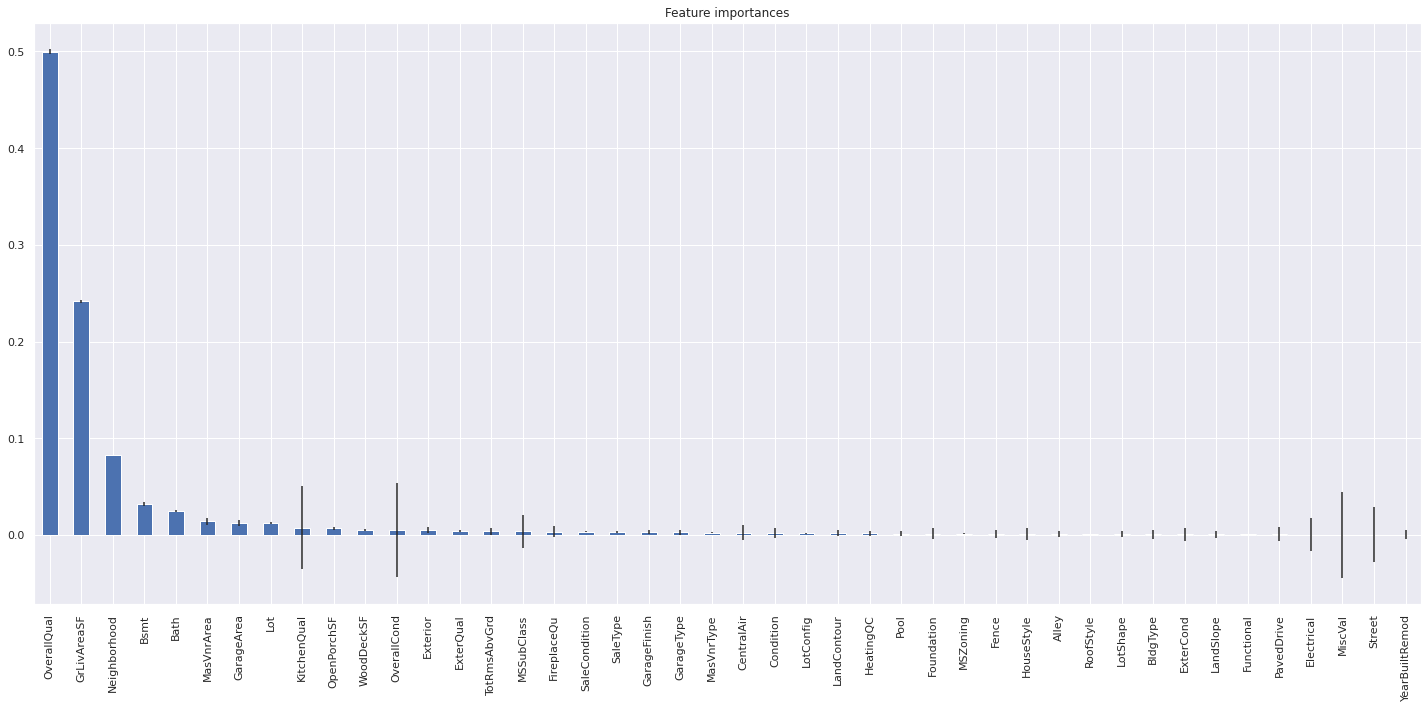

In [90]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

rf_importances = pd.Series(importances, index=X_train.columns)
rf_importances.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(20,10))
rf_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()

In [91]:
X_train_best_features = X_train.copy()
X_test_best_features = X_test.copy()

In [92]:
rf_importances.index

Index(['OverallQual', 'GrLivAreaSF', 'Neighborhood', 'Bsmt', 'Bath',
       'MasVnrArea', 'GarageArea', 'Lot', 'KitchenQual', 'OpenPorchSF',
       'WoodDeckSF', 'OverallCond', 'Exterior', 'ExterQual', 'TotRmsAbvGrd',
       'MSSubClass', 'FireplaceQu', 'SaleCondition', 'SaleType',
       'GarageFinish', 'GarageType', 'MasVnrType', 'CentralAir', 'Condition',
       'LotConfig', 'LandContour', 'HeatingQC', 'Pool', 'Foundation',
       'MSZoning', 'Fence', 'HouseStyle', 'Alley', 'RoofStyle', 'LotShape',
       'BldgType', 'ExterCond', 'LandSlope', 'Functional', 'PavedDrive',
       'Electrical', 'MiscVal', 'Street', 'YearBuiltRemod'],
      dtype='object')

In [93]:
best_features = ['OverallQual', 'GrLivAreaSF', 'Neighborhood', 'Bsmt', 'Bath',
       'GarageArea', 'MasVnrArea', 'Lot', 'OpenPorchSF', 'KitchenQual',
       'Exterior', 'WoodDeckSF', 'OverallCond', 'TotRmsAbvGrd']

X_train_best_features = X_train[best_features]
X_test_best_features = X_test[best_features]

In [94]:
for model in [lr, svm, tree, rf, adaboost, xgb, xgbrf, mlp]:
    print("RMSE for {0:23} = {1}".\
          format(str(model).split("(")[0], np.round(cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error').mean(), 3)))

RMSE for LinearRegression        = -32802.556
RMSE for SVR                     = -81142.518
RMSE for DecisionTreeRegressor   = -40875.641
RMSE for RandomForestRegressor   = -28637.425
RMSE for AdaBoostRegressor       = -31890.685
RMSE for XGBRegressor            = -26477.079
RMSE for XGBRFRegressor          = -29892.336


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


RMSE for MLPRegressor            = -45730.377


Best model is XGBRegressor. RMSE using X_train and X_train_best_features is the same.

# Grid search

In [95]:
params = [
    {'n_estimators': [100, 200, 500], 'learning_rate': [0.01, 0.05, 0.1], 'booster': ['gbtree'], 'max_depth': [4, 6, 8]},
    {'booster': ['gbtree', 'gblinear', 'dart']}
]

grid_xgb = GridSearchCV(xgb, params, cv=5, scoring='neg_root_mean_squared_error')
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                              

In [96]:
grid_xgb.best_params_

{'booster': 'gbtree',
 'learning_rate': 0.1,
 'max_depth': 4,
 'n_estimators': 200}

In [97]:
grid_xgb.best_score_

-23770.50419553642

# Final predictions

In [98]:
model = grid_xgb.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

submission = pd.DataFrame({'Id': test['Id'], "SalePrice": y_pred})
# submission.to_csv('submission.csv', index=False)